In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv


In [7]:
df = pd.read_csv('/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv')

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Need to Convert Month into date formate

In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [14]:
df = df.set_index(['Month'])

In [15]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [19]:
import matplotlib.pyplot as plt

In [27]:
df.index.year

Int64Index([1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
            ...
            1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
           dtype='int64', name='Month', length=144)

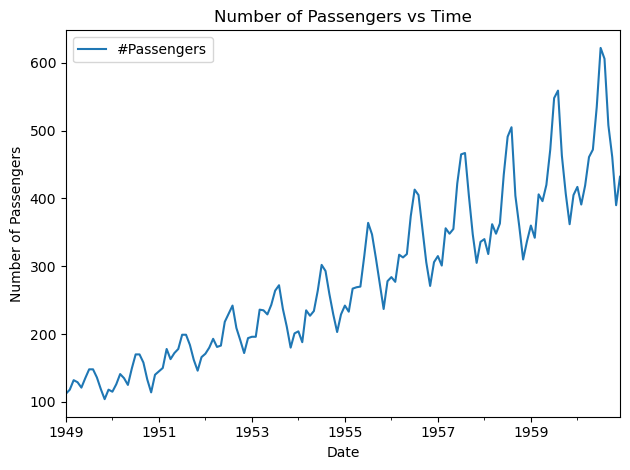

In [36]:
df.plot()
plt.title("Number of Passengers vs Time")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.tight_layout()
plt.show()

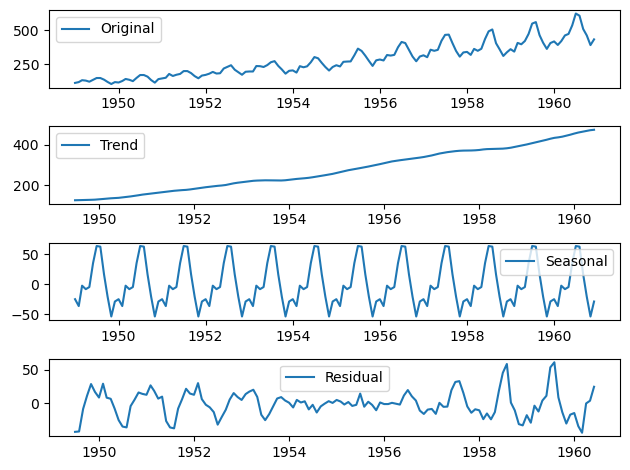

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposed = seasonal_decompose(df)

# Access the individual components
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original time series
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [55]:
import matplotlib.cm as cm

df['Month'] = df.index.month
df['Year'] = df.index.year

# Get unique years
years = df['Year'].unique()

# Create a colormap for the years
colors = cm.rainbow_r([i / len(years) for i in range(len(years))])

colors

array([[1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00],
       [1.00000000e+00, 2.55842778e-01, 1.28999217e-01, 1.00000000e+00],
       [1.00000000e+00, 4.94655843e-01, 2.55842778e-01, 1.00000000e+00],
       [9.98039216e-01, 7.09281308e-01, 3.84105749e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [6.68627451e-01, 9.65124085e-01, 6.07538946e-01, 1.00000000e+00],
       [4.96078431e-01, 9.99981027e-01, 7.09281308e-01, 1.00000000e+00],
       [3.31372549e-01, 9.65124085e-01, 7.94289890e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [5.88235294e-03, 7.00543038e-01, 9.25637660e-01, 1.00000000e+00],
       [1.70588235e-01, 4.94655843e-01, 9.66718404e-01, 1.00000000e+00],
       [3.35294118e-01, 2.55842778e-01, 9.91644696e-01, 1.00000000e+00]])

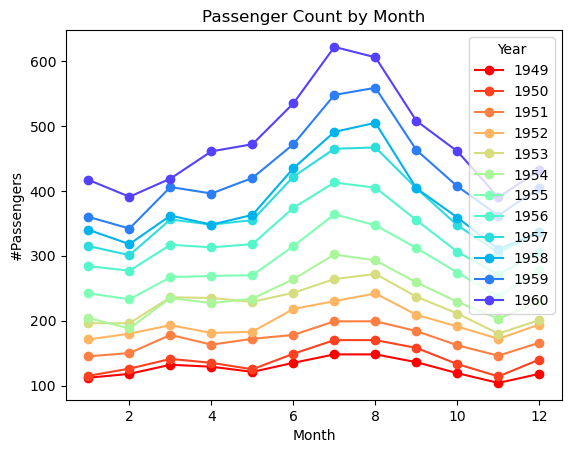

In [63]:
import matplotlib.cm as cm

df['Month'] = df.index.month
df['Year'] = df.index.year

# Get unique years
years = df['Year'].unique()

# Create a colormap for the years
colors = cm.rainbow_r([i/len(years) for i in range(len(years))])

# Plot the data
fig, ax = plt.subplots()

for year, color in zip(years, colors):
    data = df[df['Year'] == year]
    ax.plot(data['Month'], data['#Passengers'], label=str(year), color=color, marker='o')

ax.set_xlabel('Month')
ax.set_ylabel('#Passengers')
ax.set_title('Passenger Count by Month')
ax.legend(title='Year')
plt.show()
